In [167]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## MILP

In [179]:
df = pd.read_csv('../results/sensitivity_milp.tsv', sep='\t', na_values='None')
df = df.dropna().query('value > 1')

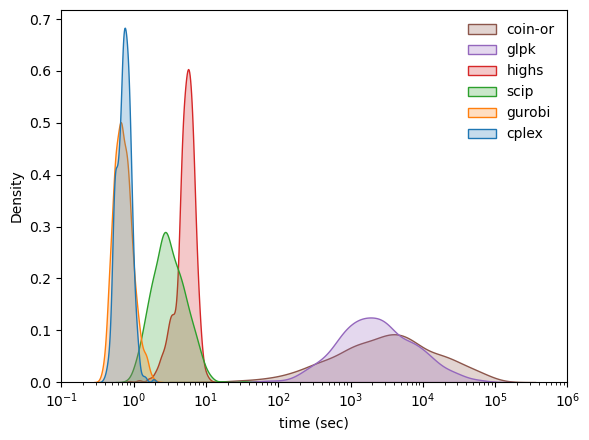

In [193]:
solver_name = {
    'CPLEX_PY': 'cplex',
    'GUROBI': 'gurobi',
    'SCIP_CMD': 'scip',
    'HiGHS_CMD': 'highs',
    'GLPK_CMD': 'glpk',
    'COIN_CMD': 'coin-or',
}

order = list(solver_name.keys())
labels = list(reversed(solver_name.values()))

f, ax = plt.subplots(1, 1, figsize=(6, 4.5))

sns.kdeplot(df, x="time", hue="interface", log_scale=True, fill=True, hue_order=order, ax=ax)
ax.set_xlim(0.1, 1e6)
ax.set_xlabel('time (sec)')
ax.legend(labels, frameon=False)

f.tight_layout()
f.savefig('sensitivity.png', dpi=300)